In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

%matplotlib inline

In [5]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten

In [9]:
model = Sequential()

# 1층
model.add(Conv2D(20, kernel_size=(5,5), padding='same',
                 input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# 2층
model.add(Conv2D(50, kernel_size=5, padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# 출력
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2450)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               1225500   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5010      
Total para

In [12]:
from keras.losses import categorical_crossentropy
from keras.optimizers import SGD

In [13]:
model.compile(loss=categorical_crossentropy, 
              optimizer=SGD(), metrics=['acc'])

In [14]:
from deepy.dataset import mnist

In [15]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_mnist(
    flatten=False, normalize=True, one_hot_label=True)

In [18]:
X_train = np.transpose(X_train, [0, 2, 3, 1])
X_test = np.transpose(X_test, [0, 2, 3, 1])

In [21]:
history = model.fit(X_train, Y_train, epochs=20, 
                    batch_size=100, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 48s 1ms/step - loss: 0.8595 - acc: 0.7586 - val_loss: 0.2776 - val_acc: 0.9200
Epoch 2/20
48000/48000 [==============================] - 48s 1ms/step - loss: 0.2490 - acc: 0.9260 - val_loss: 0.1833 - val_acc: 0.9477
Epoch 3/20
48000/48000 [==============================] - 49s 1ms/step - loss: 0.1779 - acc: 0.9461 - val_loss: 0.1443 - val_acc: 0.9588
Epoch 4/20
48000/48000 [==============================] - 48s 1ms/step - loss: 0.1401 - acc: 0.9586 - val_loss: 0.1431 - val_acc: 0.9564
Epoch 5/20
48000/48000 [==============================] - 55s 1ms/step - loss: 0.1169 - acc: 0.9654 - val_loss: 0.1035 - val_acc: 0.9710
Epoch 6/20
48000/48000 [==============================] - 49s 1ms/step - loss: 0.0995 - acc: 0.9705 - val_loss: 0.0911 - val_acc: 0.9738
Epoch 7/20
48000/48000 [==============================] - 49s 1ms/step - loss: 0.0889 - acc: 0.9734 - val_loss: 0.0980 - val_acc

In [22]:
훈련결과 = pd.DataFrame(history.history)

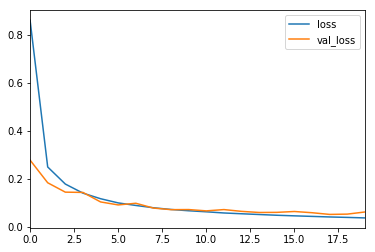

In [23]:
훈련결과[['loss', 'val_loss']].plot()

In [24]:
from keras.datasets import cifar10

In [25]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [26]:
X_train.shape

(50000, 32, 32, 3)

In [60]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [30]:
Y_train = pd.get_dummies(y_train.flatten()).values
Y_test = pd.get_dummies(y_test.flatten()).values

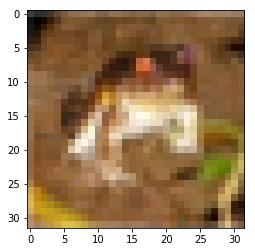

In [31]:
plt.imshow(X_train[0])

In [32]:
y_train[0]

array([6], dtype=uint8)

In [33]:
from matplotlib.image import imread

In [34]:
mozzi = imread('data/mozzi.jpg')

In [35]:
mozzi.shape

(640, 640, 3)

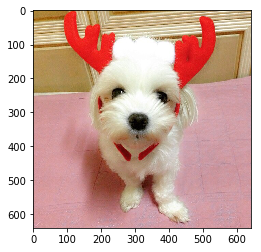

In [37]:
plt.imshow(mozzi)

합성곱 연산을 활용한 수직 방향 모서리 탐지

In [38]:
kernel = np.array([-1, 1])

3차원 텐서에 맞춰 형상 조정

In [39]:
kernel = np.expand_dims(np.expand_dims(kernel, -1), 0)
kernel

array([[[-1],
        [ 1]]])

In [41]:
from scipy.signal import correlate # 합성곱 연산 함수

In [42]:
edges = correlate(mozzi, kernel, mode='same')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


In [44]:
edges[:, :, 0]

array([[162,   7,   5, ...,  -6,  -5,  -2],
       [166,   3,   3, ...,  -3,  -3,   0],
       [169,   0,  -1, ...,  -3,  -2,   0],
       ...,
       [207, -11,  13, ...,  -1,   1,   3],
       [193,   8,   0, ...,  -7,  -6,  -1],
       [203,   1,   4, ...,   0,   5,   7]])

In [45]:
mozzi[:, :, 0]

array([[162, 169, 174, ..., 201, 196, 194],
       [166, 169, 172, ..., 196, 193, 193],
       [169, 169, 168, ..., 186, 184, 184],
       ...,
       [207, 196, 209, ..., 211, 212, 215],
       [193, 201, 201, ..., 213, 207, 206],
       [203, 204, 208, ..., 207, 212, 219]], dtype=uint8)

In [46]:
edges = np.abs(edges)
edges = edges.astype('uint8')

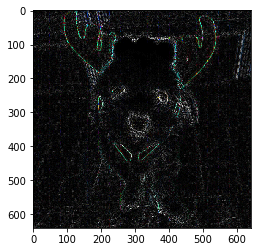

In [48]:
plt.imshow(edges * 4)

In [50]:
model = Sequential()
# 1층
model.add(Conv2D(32, kernel_size=3, padding='same', 
                 input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# 2층
model.add(Conv2D(64, kernel_size=3, padding='same', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# 출력
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [51]:
model.compile(loss=categorical_crossentropy, 
              optimizer='adam', metrics=['acc'])

In [52]:
history = model.fit(X_train, Y_train, 
                    epochs=20, batch_size=100, 
                    validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 58s 1ms/step - loss: 14.4916 - acc: 0.1007 - val_loss: 14.5837 - val_acc: 0.0952
Epoch 2/20
40000/40000 [==============================] - 58s 1ms/step - loss: 14.4869 - acc: 0.1012 - val_loss: 14.5837 - val_acc: 0.0952
Epoch 3/20
40000/40000 [==============================] - 58s 1ms/step - loss: 14.4869 - acc: 0.1012 - val_loss: 14.5837 - val_acc: 0.0952
Epoch 4/20
40000/40000 [==============================] - 58s 1ms/step - loss: 14.4869 - acc: 0.1012 - val_loss: 14.5837 - val_acc: 0.0952
Epoch 5/20
40000/40000 [==============================] - 58s 1ms/step - loss: 14.4869 - acc: 0.1012 - val_loss: 14.5837 - val_acc: 0.0952
Epoch 6/20
40000/40000 [==============================] - 58s 1ms/step - loss: 14.4869 - acc: 0.1012 - val_loss: 14.5837 - val_acc: 0.0952
Epoch 7/20
40000/40000 [==============================] - 58s 1ms/step - loss: 14.4869 - acc: 0.1012 - val_loss: 14.

KeyboardInterrupt: 

conv+conv+maxpool+conv+conv+maxpool+dense+dense

In [53]:
model = Sequential()

model.add(Conv2D(32, input_shape=(32, 32, 3),
                 kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=categorical_crossentropy, 
              optimizer='adam', metrics=['acc'])

In [54]:
history = model.fit(X_train, Y_train, 
                    epochs=10, batch_size=100, 
                    validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
17200/40000 [===========>..................] - ETA: 1:20 - loss: 14.4702 - acc: 0.1010

KeyboardInterrupt: 

In [55]:
from keras.models import load_model

In [56]:
model = load_model('data/models/cifar-10_cnn_deep.h5')

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [61]:
scores = model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 11s 1ms/step


In [62]:
print('Loss: {:.3f}, Acc: {:.3f}'.format(*scores))

Loss: 1.169, Acc: 0.735


In [66]:
mozzi.shape

(640, 640, 3)

In [67]:
from scipy.misc import imresize

In [70]:
x = imresize(mozzi, (32, 32, 3))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\ProgramData\Anaconda3\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


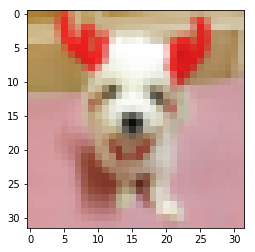

In [72]:
plt.imshow(x)

In [73]:
x = x.astype('float32') / 255.

In [75]:
Xnew = np.array([x])

In [76]:
Xnew.shape

(1, 32, 32, 3)

In [77]:
Y_pred = model.predict(Xnew)

In [80]:
np.argmax(Y_pred, axis=1)

array([5], dtype=int64)

In [81]:
car = imread('data/car.jpg')
x2 = imresize(car, (32, 32, 3))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\ProgramData\Anaconda3\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


In [82]:
x2 = x2.astype('float32') / 255.

In [83]:
x2.shape

(32, 32, 3)

In [84]:
Xnew = np.array([x, x2])

In [85]:
Y_pred = model.predict(Xnew)

In [86]:
pd.DataFrame(Y_pred)

,0,1,2,3,4,5,6,7,8,9
0,7.114949e-14,1.572859e-16,4.758559e-12,7.582465e-07,1.987877e-13,9.999993e-01,5.119962e-16,3.455380e-11,7.050206e-20,8.318561e-19
1,4.233130e-05,9.369567e-03,8.679445e-14,9.894847e-09,4.443364e-17,1.945492e-09,9.353924e-11,2.041891e-12,8.011353e-06,9.905801e-01


In [87]:
np.argmax(Y_pred, axis=1)

array([5, 9], dtype=int64)

In [93]:
from keras.applications.vgg16 import VGG16, preprocess_input

In [90]:
vgg16 = VGG16(weights=None)

In [91]:
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [92]:
vgg16.load_weights('data/models/vgg16_weights_tf_dim_ordering_tf_kernels.h5')

In [ ]:
from keras.preprocessing import image

In [104]:
img = image.load_img('data/mozzi.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = preprocess_input(x)

In [110]:
img2 = image.load_img('data/car.jpg', target_size=(224, 224))
x2 = image.img_to_array(img2)
x2 = preprocess_input(x2)

In [111]:
Xnew = np.array([x, x2])

In [112]:
Y_pred = vgg16.predict(Xnew)

In [113]:
np.max(Y_pred, axis=1)

array([0.9217771, 0.2995202], dtype=float32)

In [114]:
np.argmax(Y_pred, axis=1)

array([153, 751], dtype=int64)

In [115]:
from keras.models import Model

In [126]:
model_vgg_layer1 = Model(
    inputs=vgg16.input, outputs=vgg16.layers[1].output)

In [127]:
features = model_vgg_layer1.predict(np.array([x]))

In [128]:
features.shape

(1, 224, 224, 64)

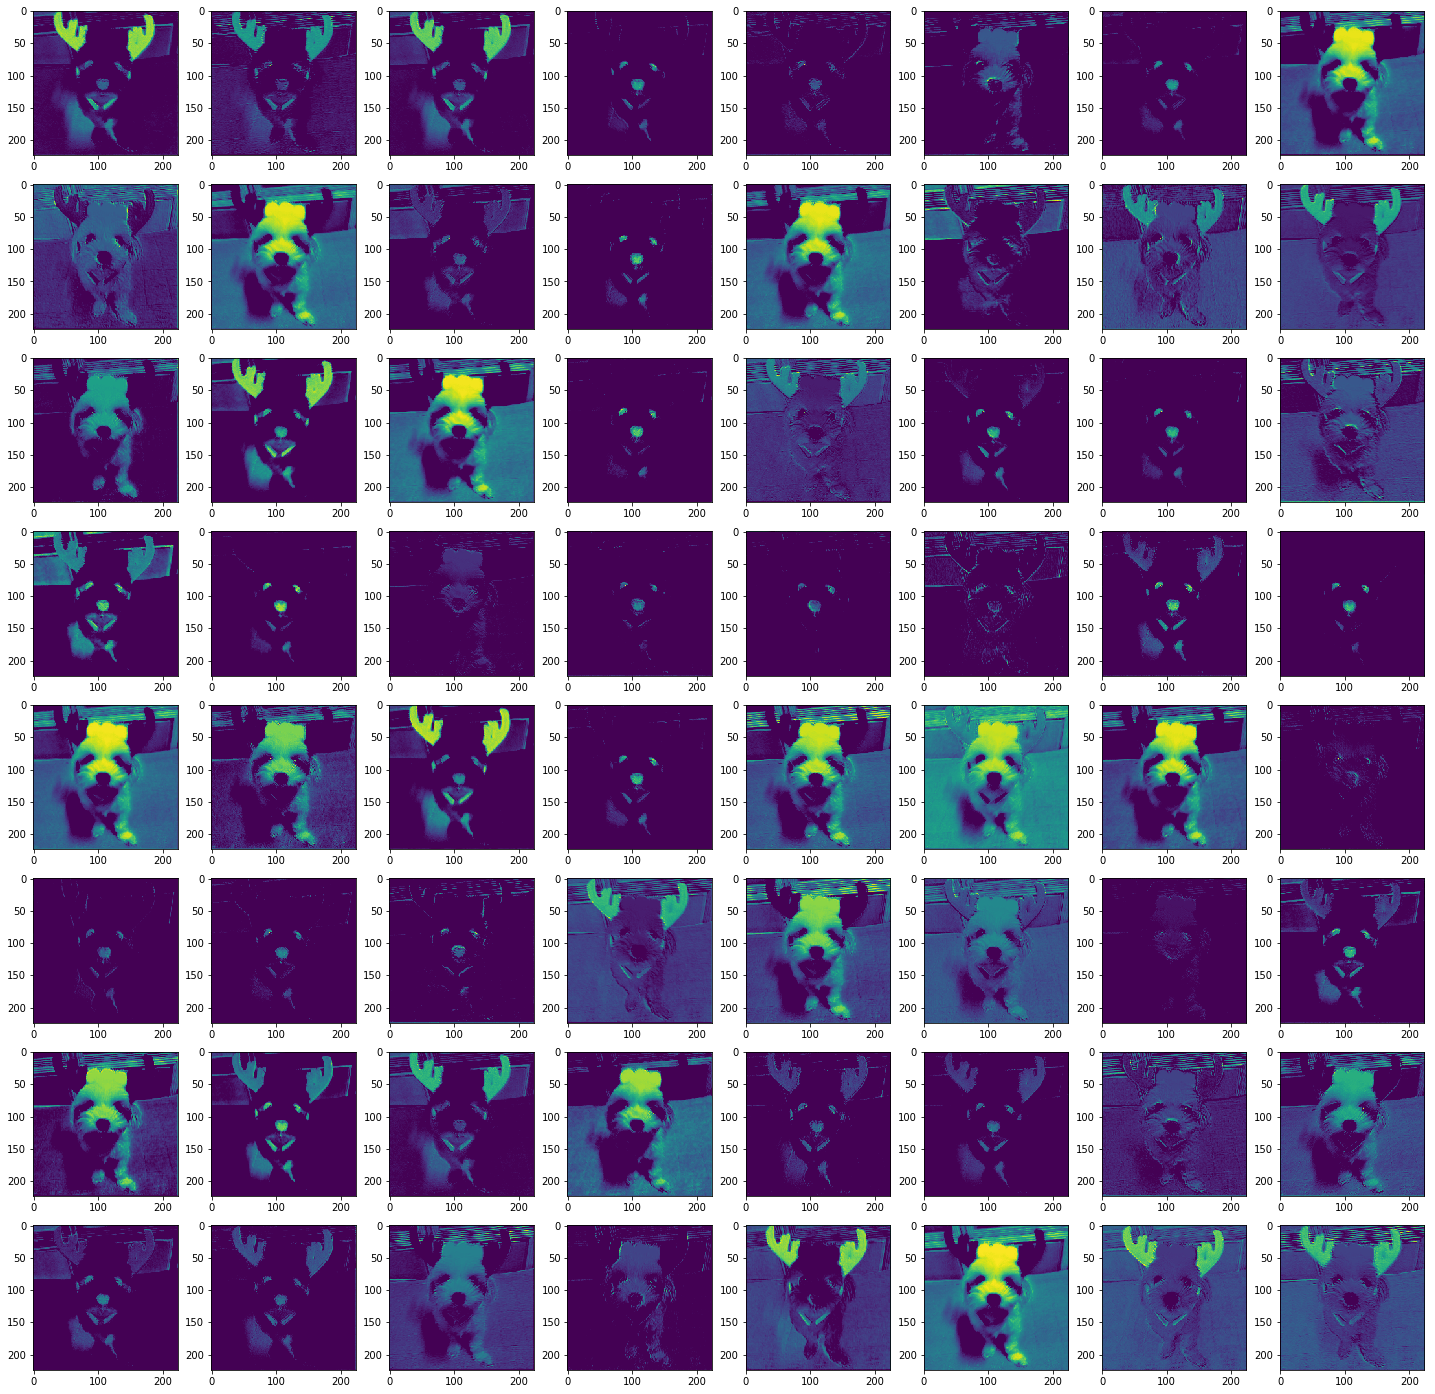

In [129]:
fig, axes = plt.subplots(8, 8, figsize=(25, 25))

for i, subplot in enumerate(axes.ravel()):
    subplot.imshow(features[0, :, :, i])

In [130]:
from keras.layers import GlobalAveragePooling2D

In [132]:
model = Sequential()

model.add(Conv2D(96, kernel_size=3, input_shape=(32, 32, 3), 
                 activation='relu'))
model.add(Conv2D(96, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(192, kernel_size=3, activation='relu'))
model.add(Conv2D(192, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(192, kernel_size=3, activation='relu'))
model.add(Conv2D(192, kernel_size=1, activation='relu'))
model.add(Conv2D(10, kernel_size=1, activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation='softmax'))

model.compile(loss=categorical_crossentropy, 
              optimizer='adam', metrics=['acc'])
history = model.fit(X_train, Y_train, 
                    epochs=10, batch_size=100, 
                    validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 417s 10ms/step - loss: 2.1179 - acc: 0.2068 - val_loss: 1.9493 - val_acc: 0.3093
Epoch 2/10
40000/40000 [==============================] - 416s 10ms/step - loss: 1.5572 - acc: 0.4394 - val_loss: 1.2669 - val_acc: 0.5567
Epoch 3/10
40000/40000 [==============================] - 418s 10ms/step - loss: 1.1898 - acc: 0.5727 - val_loss: 1.1100 - val_acc: 0.6115
Epoch 4/10
38100/40000 [===========================>..] - ETA: 18s - loss: 1.0161 - acc: 0.6416

KeyboardInterrupt: 

# RNN

In [134]:
airline = pd.read_csv('data/international-airline-passengers.csv')

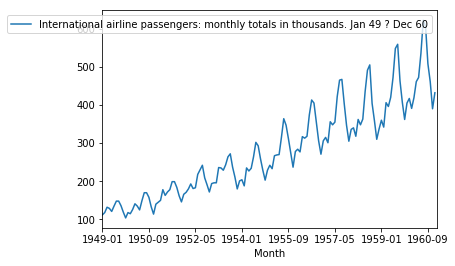

In [137]:
airline.set_index('Month').plot()

In [148]:
airline = airline.dropna()

In [149]:
X = airline.iloc[:, 1].values

In [141]:
X[:5]

array([112., 118., 132., 129., 121.])

In [142]:
from sklearn.preprocessing import MinMaxScaler

In [143]:
scaler = MinMaxScaler()

In [153]:
X = scaler.fit_transform(X.reshape(-1, 1))

In [154]:
X[:3]

array([[0.01544402],
       [0.02702703],
       [0.05405405]])

In [155]:
y = X[1:].flatten()

In [156]:
y[:5]

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556])

In [159]:
X = X[:-1]

In [160]:
len(X) == len(y)

True

In [161]:
from keras.layers import SimpleRNN # 1991
from keras.layers import LSTM # 1997

In [162]:
from sklearn.model_selection import train_test_split

In [166]:
X = X.reshape(-1, 1, 1)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=False)

In [169]:
X_train.shape

(107, 1, 1)

In [173]:
time_step = X.shape[1] # 1
특징수 = X.shape[2] 

model = Sequential()
model.add(LSTM(4, input_shape=(time_step, 특징수)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [174]:
history = model.fit(
    X_train, y_train, epochs=10, batch_size=2)

Epoch 1/10
107/107 [==============================] - 1s 8ms/step - loss: 0.0962
Epoch 2/10
107/107 [==============================] - 0s 729us/step - loss: 0.0636
Epoch 3/10
107/107 [==============================] - 0s 505us/step - loss: 0.0447
Epoch 4/10
107/107 [==============================] - 0s 679us/step - loss: 0.0345
Epoch 5/10
107/107 [==============================] - 0s 664us/step - loss: 0.0297
Epoch 6/10
107/107 [==============================] - 0s 701us/step - loss: 0.0274
Epoch 7/10
107/107 [==============================] - 0s 664us/step - loss: 0.0260
Epoch 8/10
107/107 [==============================] - 0s 682us/step - loss: 0.0251
Epoch 9/10
107/107 [==============================] - 0s 682us/step - loss: 0.0243
Epoch 10/10
107/107 [==============================] - 0s 654us/step - loss: 0.0232


In [175]:
훈련결과 = pd.DataFrame(history.history)

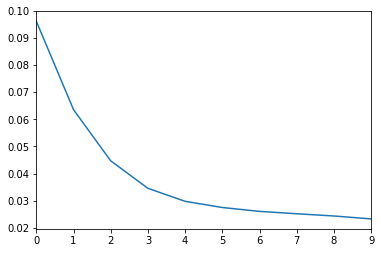

In [176]:
훈련결과['loss'].plot()

In [177]:
from sklearn.metrics import r2_score

In [179]:
Y_pred_train = model.predict(X_train)

In [181]:
y_pred_train = Y_pred_train.flatten()

In [182]:
r2_score(y_train, y_pred_train)

0.16074767186845773